Goal:

- show that our fitting procedure is robust to noise
- that an incorrect choice of initial parameters may give wrong results


In [1]:
from ANEMO import ANEMO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
from lmfit import  Model, Parameters
lmfit.__version__

'0.9.10'

# Loading eye movement data

In [2]:
import pickle
with open('../demo/result/param_Fit_AM.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')
with open('../demo/data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

# Creating a fitting procedure

In [3]:
fig_width=15/3
t_titre=35/2
t_label=20/2
dpi=400
block = 1

In [4]:
def regress(ax, p, data, minx, miny, maxx, maxy, t_label=12) :
    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    x_test = np.linspace(np.min(p), np.max(p), 100)
    fitLine = slope * x_test + intercept
    ax.plot(x_test, fitLine, c='k', linewidth=2)
    ax.text(maxx-((maxx-minx)/16.180),miny+((maxy-miny)/10), 'r = %0.3f'%(r_), fontsize=t_label/1.2, ha='right')

    return ax

In [5]:
def fit(x, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, step_fit, bruit,
        TargetOn, StimulusOf, start_sac=770, stop_sac=820):

    np.random.seed(7)
    
    param_fit={'tau':tau_fit, 'maxi':maxi_fit, 'v_anti':v_anti_fit, 'latence':latence_fit,
               'start_anti':start_anti_fit}
    
    result_fit={'old_v_anti':[], 'old_v_anti_true_50':[], 'old_v_anti_true_start':[], 'old_v_anti_fit':[]}
    
    for N_trial in range(200) :
        trial = N_trial
        print(block, trial)
        
        
        bino = exp['p'][trial][block][0]
        start_anti_true = param['start_anti'][block][trial]+TargetOn
        v_anti_true = param['v_anti'][block][trial]
        latence_true = param['latence'][block][trial]+TargetOn
        tau_true = param['tau'][block][trial]
        maxi_true = param['maxi'][block][trial]

        #------------------------------------------------------------------------------------
        true_test = ANEMO.fct_velocity(x, bino, start_anti_true, v_anti_true, latence_true, tau_true, maxi_true)
        test = ANEMO.fct_velocity(x, bino, start_anti_true, v_anti_true, latence_true, tau_true, maxi_true)+np.random.rand(len(x))*bruit
        test = test-np.random.rand(len(x))*bruit
        #test[start_sac:stop_sac] = np.arange(0, (stop_sac-start_sac), 1)*np.nan

        #------------------------------------------------------------------------------------
        result_deg = ANEMO.Fit_velocity(test, x, bino, param_fit=param_fit, sup=None, step=step_fit)

        
        start_anti_fit = result_deg.values['start_anti']
        v_anti_fit = result_deg.values['v_anti']
        latence_fit = result_deg.values['latence']
        tau_fit = result_deg.values['tau']
        maxi_fit = result_deg.values['maxi']
        
        best_fit = ANEMO.fct_velocity(x, bino, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit)
        #------------------------------------------------------------------------------------
        result_fit['old_v_anti'].append(np.nanmean(test[TargetOn-50:TargetOn+50]))
        result_fit['old_v_anti_true_50'].append(np.nanmean(true_test[TargetOn-50:TargetOn+50]))
        result_fit['old_v_anti_fit'].append(np.nanmean(best_fit[int(start_anti_fit):int(latence_fit)]))
        result_fit['old_v_anti_true_start'].append(np.nanmean(true_test[int(start_anti_true):int(latence_true)]))
        #------------------------------------------------------------------------------------
        
    return result_fit

In [6]:
x = np.arange(0, 1500, 1)
TargetOn, StimulusOf = 750, 750-300

In [7]:
def defaut():
    start_anti_fit = [TargetOn-100, StimulusOf-200, TargetOn+75]
    latence_fit = [TargetOn+100, TargetOn+75, len(x)]
    v_anti_fit = [0., -40., 40.]
    tau_fit = [15., 13., 80.]
    maxi_fit = [15., 1., 40.]

    return(start_anti_fit, latence_fit, v_anti_fit, tau_fit, maxi_fit)

In [8]:
start_anti_fit, latence_fit, v_anti_fit, tau_fit, maxi_fit = defaut()
result_fit = fit(x, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, 2, 10,TargetOn, StimulusOf)

1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184


In [9]:
def V_a(x, result_fit, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, TargetOn, StimulusOf) :
    fig1, axs1 = plt.subplots(1, 1, figsize=(fig_width*1, (fig_width*1)/1.6180))
    fig2, axs2 = plt.subplots(1, 1, figsize=(fig_width*1, (fig_width*1)/1.6180))
    #-----------------------------------------------------------------------------------
    axs1.set_xlabel('True V$_a$ onset (°/s)', fontsize=t_label)
    axs1.set_ylabel('Fit V$_a$ (°/s)', fontsize=t_label)
    axs1.scatter(result_fit['old_v_anti_true_start'], result_fit['old_v_anti_fit'], c='r', alpha=0.5)
    #-----------------------------------------------------------------------------------
    axs2.set_xlabel('True V$_a$ 50 (°/s)', fontsize=t_label)
    axs2.set_ylabel('Classical V$_a$ (°/s)', fontsize=t_label)
    axs2.scatter(result_fit['old_v_anti_true_50'], result_fit['old_v_anti'], c='c', alpha=0.5)
    #-----------------------------------------------------------------------------------
    min_y1, max_y1 = min(result_fit['old_v_anti_fit']), max(result_fit['old_v_anti_fit'])
    min_y2, max_y2 = min(result_fit['old_v_anti']), max(result_fit['old_v_anti'])
    min_x1, min_x2 = min(result_fit['old_v_anti_true_start']),  min(result_fit['old_v_anti_true_50'])
    max_x1, max_x2 = max(result_fit['old_v_anti_true_start']), max(result_fit['old_v_anti_true_50'])
    
    min_x, min_y = min(min_x1, min_x2), min(min_y1, min_y2)
    max_x, max_y = max(max_x1, max_x2), max(max_y1, max_y2)
    
    axs1 = regress(axs1, result_fit['old_v_anti_true_start'], result_fit['old_v_anti_fit'], min_x, min_y, max_x, max_y, t_label=t_titre/1.5)
    axs2 = regress(axs2, result_fit['old_v_anti_true_50'], result_fit['old_v_anti'], min_x, min_y, max_x, max_y, t_label=t_titre/1.5)
    
    
    for a in [axs1, axs2] :
        a.plot([-2000, 2000], [-2000, 2000], '--k', alpha=0.5)
        a.set_title('Anticipatory velocity', fontsize=t_titre, x=0.5, y=1.05) #Velocity of anticipation
        a.axis([min_x-((max_x-min_x)/10), max_x+((max_x-min_x)/10), min_y-((max_y-min_y)/10), max_y+((max_y-min_y)/10)]) 
    
    fig1.tight_layout()
    fig2.tight_layout()
    fig1.savefig('../2018-05-04_Poster_Grenobe/figures/old_v_anti_fit_true_Full_2_%s.png'%block, dpi=dpi)    
    fig2.savefig('../2018-05-04_Poster_Grenobe/figures/old_v_anti_true_classique_Full_2_%s.png'%block, dpi=dpi)
    plt.show()

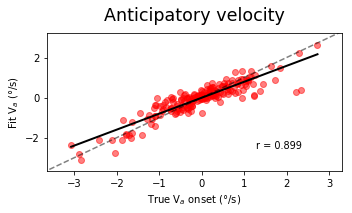

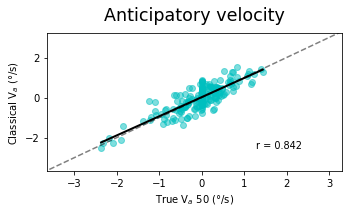

In [10]:
V_a(x, result_fit, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, TargetOn, StimulusOf)